[//]: # (TITLE)    
<div style="font-variant: small-caps;font-weight: normal; font-size: 30px;
        text-align: center; padding: 15px; margin: 10px">
        
    <b>Cython</b>
    </div>
    


[//]: # (SUBTITLE)     
<div style="font-variant: small-caps; font-weight: normal; font-size: 20px;
        text-align: center; padding: 15px;">
        
    A quick reference for its usage
    </div>



[//]: # (AUTHORS)  
<div style="float:right; font-size: 12px; line-height: 12px;
        padding: 10px 15px 8px;">
        
    Alberto Ibarrondo
    </div>
   
   
   
[//]: # (DATE)    
<div style="display: inline-block; font-family: 'Lato' sans-serif;
        font-size: 12px; font-weight: bold; line-height: 12px;
        letter-spacing: 1px; padding: 10px 15px 8px">

    06/04/2018
    </div>


# Compiling & Running Cython

## Distutils
This is the standard way, using a setup.py file with:

In [1]:
from distutils.core import setup
from Cython.Build import cythonize

Then you compile using:

```python setup.py build_ext```

```python setup.py build_ext --compiler=msvc``` if Windows and Visual Studio C++

In order to automatically include it with pip, do:

```pip install --upgrade setup.py ```

If anything went wrong, you can always delete it:

```pip uninstall PACKAGENAME```

In [ ]:
import fib
fib.fib(50)
#Int size condiitons the result!

In [ ]:
fib.fib(50)

## IPython magic

In [2]:
%load_ext Cython

In [31]:
%%cython -n fib2 -a
def fib_magic(long n):
    cdef long i
    cdef double a=0.0, b=1.0
    for i in range(n):
        a, b = a+b, a
    return a

In [32]:
fib_magic

<function fib2.fib_magic>

## Automatic import pyximport

In [14]:
import pyximport
pyximport.install()

(None, <pyximport.pyximport.PyxImporter at 0x2a922cabbe0>)

In [16]:
import cython_particle   # cython_particle.pyx

# Cython in Depth

##  Static type declaration with cdef

In [46]:
%%cython 
def myFun(a, b):
    cdef int i=1, k, l
    cdef:
        float p = 3.3
        long int j = 2
    return a*i+b*j+p

In [47]:
myFun(1,2)

8.299999952316284

In [49]:
%%cython 
def cdefExamples():
    # Pointers
    cdef int *p     # Single dereference
    cdef void **buf # Double dereference, e.g.: char* a[] == char** a
                    #  Pointer to pointer, pointer to array,
                    #  array of pointers, array of arrays
    
    # Stack allocated C arrays
    cdef int arr[10]
    cdef double points[20][30]
    # typedef - new stuff
    cdef size_t len
    # Structs and Unions
    #cdef tm time_struct
    #cdef int_short_union_t hi_lo_bytes
    # Function pointers
    cdef void (*f)(int, double)
    return None

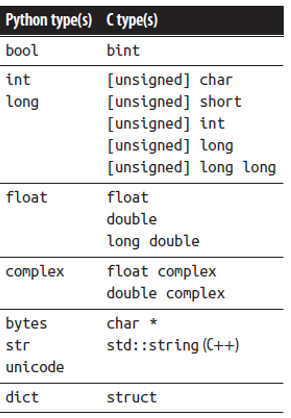


## C Pointers in Cython
Defining C pointers is like in C, but accessing them is done like an array

In [14]:
%%cython
cdef int *p_int
cdef int a=123
p_int=&a
p_int[0]=3
print(a)

3


Accessing structs is done using dot instead of arrow

In [25]:
%%cython 
cdef struct st_t:
    int a

cdef st_t ss = st_t(a=2)
cdef st_t *p_st = &ss
cdef int a_doubled = p_st.a + p_st.a
print(a_doubled)

4


## Functions in Cython
There are three ways to define functions:
1. ```def``` statement, allowing both python objects and c objects to be called
2. ```cdef``` using a c-only version that will not be called outside the Python code. Requires python wrappers. Can be called by both inside Python and C
3. ```cpdef``` hybrid between the two. Can be called by outside Python, requires arguments and return types to be compatible with C and Python. All Python objects are included, but void, C pointers or C arrays are not possible. Check table.

In [26]:
# Pure python
def py_fact(n):
    if n<=1:
        return 1
    return n * py_fact(n-1)

In [31]:
%%cython
# Statically typed variable, but still python function and objects
def typed_fact(long n):
    if n<=1:
        return 1
    return n * typed_fact(n-1)

In [39]:
%%cython
# C function in Cython. It could use inline
cdef long c_fact(long n):
    if n<=1:
        return 1
    return n * c_fact(n-1)
def wrap_c_fact(n):
    return c_fact(n)

In [56]:
%%cython
# Callable C function in Python
# INLINE suggests the compiler to replace the function calls by the code
cpdef inline long cp_fact(long n):
    if n<=1:
        return 1
    return n * cp_fact(n-1)

In [29]:
%timeit py_fact(20)

2.56 µs ± 29.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [33]:
%timeit typed_fact(20)

1.05 µs ± 15.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [48]:
%timeit wrap_c_fact(20)

91.5 ns ± 0.657 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [47]:
%timeit cp_fact(20)

89.3 ns ± 0.866 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


### Exceptions

In [50]:
%%cython
# Question mark is used if value could be generated without Exception.
#   Value must be in range of type
# except* would always check for exception, but has overhead.
cpdef double divide_ints(double i, double j) except? -1:
    return i / j

In [51]:
divide_ints(1, 0)

ZeroDivisionError: float division

In [53]:
py_fact? # Check info on that object

## Type Casting
Instead of the C parentehses, Cython uses <> for Explicit casting.

In [ ]:
%%cython
a = 3
cdef list cast_list = <list>a # If we are certain of the casting
cdef list cast_list2 = <list?>a # If we are uncertain of the casting

## Structs, Unions and Enums 

### Declaration

In [ ]:
%%cython
# Seamless creation
cdef struct mycpx:
    float real
    float imag
cdef union uu:
    int a
    short b, c    
cdef enum PRIMARIES:
    RED = 1
    YELLOW = 3
    BLUE = 5
    
# Creating also a new type alias
ctypedef struct mycpx:
    float real
    float imag
ctypedef union uu:
    int a
    short b, c
ctypedef enum SECONDARIES:
    ORANGE, GREEN, PURPLE
    
# Anonymous stucts and unions are not supported, but anonymous enums are:
cdef enum:
    GLOBAL_SEED = 37

### Initialization

In [ ]:
%%cython
# Struct Literals
cdef mycpx a = mycpx(3.1415, -1.0)
cdef mycpx b = mycpx(real=2.718, imag=1.618034)
# By inidvidual names
cdef mycpx zz
zz.real = 3.1415
zz.imag = -1.0
# Form a Python dictionary (more Python overhead)
cdef mycpx zz = {'real': 3.1415, 'imag': -1.0}

Nested Structs/unions are not supported. You need to unnest. (page 58 manual)

## Type Aliasing with ctypedef
Used to generate new types based on current types.

In [ ]:
%%cython
ctypedef double real
ctypedef long integral

def displacement(real d0, real v0, real a, real t):
    """Calculates displacement in constant acceleration."""
    cdef real d = d0 + (v0 * t) + (0.5 * a * t**2)
    return d

### Fused Types

They allow several types on one, generating replicas of functions for each type. `integral`, `floating` and `numeric`.

In [ ]:
%%cython
from cython cimport integral
cpdef integral integral_max(integral a, integral b):
    return a if a >= b else b

In [59]:
%%cython
# we can also create our own fused type
cimport cython
ctypedef fused integral_or_floating:
    cython.short
    cython.int
    cython.long
    cython.float
    cython.double

## For & While Loops

When looping over a range, type the range argument and the index as C types (best as integers) to obtain a speed boost.

In [ ]:
%%cython
cdef unsigned int i, n = len(a) - 1
for i in range(1, n):
    a[i] = (a[i-1] + a[i] + a[i+1]) / 3.0

## Preprocessor: #define

In [ ]:
%%cython
DEF E = 2.718281828459045
DEF PI = 3.141592653589793

The DEF declaration must evaluate on int, float or string.

IF - ELIF - ELSE compile-time statements are also allowed

In [ ]:
%%cython
IF UNAME_SYSNAME == "Windows":
# ...Windows-specific code...
ELIF UNAME_SYSNAME == "Darwin":
# ...Mac-specific code...
ELIF UNAME_SYSNAME == "Linux":
# ...Linux-specific code...
ELSE:
# ...other OS...

### Strings

There are 3 types fo Python strings, different depending of the Python version. `bytes` is pure ascii, `unicode` is pure utf-8, and `str` is variable. Use statically typed `bytes` if no accents, and `unicode` if accents or other stuff.

# Classes & Python to Cython

PROFILING: allows us to determine where the code spends its time (section 7) cProfile module or %run -p



In [12]:
%run -p nbody.py 500000

-0.169075164
-0.169096567
 

- Inspect hotspots, convert to Cython. 
- Create converters if necessary.
- Convert hotspots to C-level data structures and remove Python from loops. 
- Ensure static typing.

Generally, only a small fraction of the code needs to be converted. The rest SHOULD NOT.

## Classes/Extension modules and Attributes

Unlike Python, cython classes cannot accept dynamically typed attributes. The reason is because attributes use a C struct instead of a Python dict.

By typing attributes, we obtain a way to access and modify them:

In [19]:
%%cython
cdef class Particle:
    """Simple Particle extension type."""
    cdef public double mass
    cdef readonly double position
    cdef double velocity
    def __init__(self, m, p, v):
        self.mass = m
        self.position = p
        self.velocity = v
    def get_momentum(self):
        return self.mass * self.velocity

In [20]:
par = Particle(1.0, 2.0, 3.0)

In [21]:
par.mass

1.0

In [22]:
par.position

2.0

In [23]:
par.velocity

AttributeError: '_cython_magic_58cc2f0438a7d23ff238bc79c7ff766e.Par' object has no attribute 'velocity'

In [25]:
par.mass = 4
par.position = 4

AttributeError: attribute 'position' of '_cython_magic_58cc2f0438a7d23ff238bc79c7ff766e.Particle' objects is not writable

## `__cinit__`

In order to initialize things like a dinamically allocated C array, we use `__cinit__`

In [30]:
%%cython
from libc.stdlib cimport malloc, free
cdef class Matrix:
    cdef:
        unsigned int nrows, ncols
        double *_matrix
    def __cinit__(self, nr, nc):
        self.nrows = nr
        self.ncols = nc
        self._matrix = <double*>malloc(nr * nc * sizeof(double))
        if self._matrix == NULL:
            raise MemoryError()
    def __dealloc__(self):
        if self._matrix != NULL:
            free(self._matrix)

## Inheritance and subclassing

This way we can establish inherited attributes and methods. cdef VS cpdef is a bit faster (doesn't cross boundaries) but not callable in python, only Cython. 

In [ ]:
%%cython
cdef class CParticle(Particle):
    cdef double momentum
    def __init__(self, m, p, v):
        super(CParticle, self).__init__(m, p, v)
        self.momentum = self.mass * self.velocity
    cpdef double get_momentum(self):
        return self.momentum

Casting from a python object to a static cython class avoids the search in the dictionary and python overhead:

In [ ]:
%%cython
cdef Particle static_p = p
print static_p.get_momentum()
print static_p.velocity

Same thing is achieved with the casting operator (using ? if unsafe to avoid segmentation fault):

In [ ]:
%%cython
print (<Particle>p).get_momentum()
print (<Particle?>p).velocity

### None checking

In [ ]:
def dispatch(Particle p not None):
    print p.get_momentum()
    print p.velocity
    
# is equivalent to

def dispatch(Particle p):
    if p is None:
        raise TypeError("...")
    print p.get_momentum()
    print p.velocity

## Extension Type Properties

Declaring attributes can be done using Python properties

In [ ]:
%%cython
# Python version
class Particle(object):
    # ...
    def _get_momentum(self):
        return self.mass * self.velocity
    momentum = property(_get_momentum)
    
# Cython version
cdef class Particle:
    """Simple Particle extension type."""
    cdef double mass, position, velocity
    # ...
    property momentum:
        """The momentum Particle property."""
        def __get__(self):
            """momentum's getter"""
            return self.mass * self.velocity
        def __set__(self, m):
            """momentum's setter"""
            self.velocity = m / self.mass

## Special Methods

### Math operators

To support the in-place + operator for a pure-Python class C, we define an
`__add__(self, other)` method. The operation c + d is transformed into
`C.__add__(c, d)` when c is an instance of the C class

In [ ]:
cdef class E:
    """Extension type that supports addition."""
    cdef int data
    def __init__(self, d):
        self.data = d
    def __add__(x, y):
        # Regular __add__ behavior
        if isinstance(x, E):
            if isinstance(y, int):
                return (<E>x).data + y   # CASTING IS MANDATORY
        # __radd__ behavior
        elif isinstance(y, E):
            if isinstance(x, int):
                return (<E>y).data + x
        else:
            return NotImplemented

It is necessary to check both types, because either of them could hold the type

### Rich Comparisons

`__richcmp__(x, y, op)` performs all kinds of comparisons. Op is an `int`, which can be:

| Integer argument |  Comparison |
| ------------- |:-------------:|
|Py_LT| <|
|Py_LE| <=|
|Py_EQ| ==|
|Py_NE| !=|
|Py_GT |>|
|Py_GE |>=|



In [ ]:
%%cython
from cpython.object cimport Py_LT, Py_LE, Py_EQ, Py_GE, Py_GT, Py_NE
cdef class R:
    """Extension type that supports rich comparisons."""
    cdef double data
    def __init__(self, d):
        self.data = d
    def __richcmp__(x, y, int op):
        cdef:
            R r
            double data
    # Make r always refer to the R instance.
    r, y = (x, y) if isinstance(x, R) else (y, x)
    data = r.data
    if op == Py_LT:
        return data < y
    elif op == Py_LE:
        return data <= y
    elif op == Py_EQ:
        return data == y
    elif op == Py_NE:
        return data != y
    elif op == Py_GT:
        return data > y
    elif op == Py_GE:
        return data >= y
    else:
        assert False

### Iterator

In [25]:
%%cython
cdef class I:
    cdef:
        list data
        int i
    def __init__(self):
        self.data = list(range(100))
        self.i = 0
    def __iter__(self):
        return self
    def __next__(self):
        if self.i >= len(self.data):
            self.i = 0
            raise StopIteration()
        ret = self.data[self.i]
        self.i += 1
        return ret
i = I()
it = iter(I())

In [24]:
s=0
for x in i:
    s+=x
print(s)

4950


In [45]:
next(it)

17

In [9]:
a = 4
raise Exception()
b = 3

Exception: 

In [10]:
%debug

> <ipython-input-9-b8fcc5ae680b>(2)<module>()
      1 a = 4
----> 2 raise Exception()
      3 b = 3

ipdb> a
ipdb> print(a)
4
ipdb> print(b)
*** NameError: name 'b' is not defined
ipdb> exit


# Organizing Cython Code

- `.pyx` are _implementation_ files.
- `.pxd` are _definition_ files.
- `.pxi` are _include_ files.
- `cimport` accesses at compilaiton time the C-level stuff, declarations in .pxd. 

## `.pxd` Files for definition

They contain:

- C type declarations—ctypedef, struct, union, or enum (Chapter 7)
- Declarations for external C or C++ libraries (i.e., cdef extern blocks—Chapters 7
and 8)
- Declarations for cdef and cpdef module-level functions
- Declarations for cdef class extension types
- The cdef attributes of extension types
- Declarations for cdef and cpdef methods
- The implementation of C-level inline functions and methods

A definition file cannot contain:

- Implementations of Python or non-inline C functions or methods
- Python class definitions (i.e., regular classes)
- Executable Python code outside of IF or DEF macros

Example of a `.pxd` file, only with the C-Level **declarations** in it (no colon ':')

In [13]:
%%cython
ctypedef double real_t
cdef class State:
    cdef:
        unsigned int n_particles
        real_t *x
        real_t *vx
    cpdef real_t momentum(self)
cpdef run(State st)
cpdef int step(State st, real_t timestep)

Example of a `.pyx` file, with the Python & Cython **definitions** in it (with colon ':'):

In [13]:
%%cython
cdef class State:
    def __cinit__(...):
        # ...
    def __dealloc__(...):
        # ...
    cpdef real_t momentum(self):
        # ...
def setup(input_fname):
    # ...
cpdef run(State st):
    # ...calls step function repeatedly...
cpdef int step(State st, real_t timestep):
    # ...advance st one time step...
def output(State st):
    # ...

## `cimport` Statement

For those C-level elements defined in `.pxd` files, `cimport` allows them to be imported.

In [ ]:
%%cython
from simulator cimport State as sim_state, step
from simulator import setup as sim_setup
cdef class NewState(sim_state):
    cdef:
        # ...extra attributes...
    def __cinit__(self, ...):
        # ...
    def __dealloc__(self):
        # ...
def setup(fname):
    # ...call sim_setup and tweak things...
cpdef run(sim_state st):
    # ...improved run with simulator.step...

It is a compileError to either import Python with `cimport` or to import C with `import`. Using definition files allows architecture to be modular.

### Predefined Definiton files

- `libc`: all basic C, including `stdlib`, `stdio`, `math` and `string`.
- `libcpp`: for C++, `string`, `vector`, `list`, `map`, `pair`, and `set`.
- `cpython`: all Python/C API functions.
- `numpy`.

### Cimporting examples

In [8]:
%%cython
# Cimport normally
from libc cimport math

# Import object with dotted module name
from libc.math cimport sin

# Multiple Named imports
from libc.stdlib cimport rand, srand, qsort, malloc, free
cdef int *a = <int*>malloc(10 * sizeof(int))

# Import with alias
from libc.string cimport memcpy as c_memcpy

# C++ STL template classes
from libcpp.vector cimport vector
cdef vector[int] *vi = new vector[int](10)



## `.pxi` include Files

These filles allow some degree of customization depending on the OS and platform. Multiple includes cannot lead to duplicated definitions or implementations. We obtain source-level inclusion. There is no need to use them in most cases.

In [ ]:
%%cython
# Contents of .pxi file
IF UNAME_SYSNAME == "Linux":.
    include "linux.pxi"
ELIF UNAME_SYSNAME == "Darwin":
    include "darwin.pxi"
ELIF UNAME_SYSNAME == "Windows":
    include "windows.pxi"

## Example: organizing simulator

In [ ]:
pysimulator
├── __init__.py
├── main.py
├── core
│ ├── __init__.py
│ ├── core.py
│ └── sim_state.py
├── plugins
│ ├── __init__.py
│ ├── plugin0.py
│ └── plugin1.py
├── utils
├── __init__.py
├── config.py
└── output.py

Suppose we want *core.py*, *sim_state.py* and *plugin0.py* to be converted into Cython. *sim_state* contains *State* class, to be converted into extension type. *core.py* contains *run* and *step* to be converted into cpdef functions.

1) Convert .py modules into implementation files and extract public declarations into declaration files `.pxd`.

In [ ]:
%%cython
#sim_state.pxd
ctypedef double real_t
cdef class State:
    cdef:
        unsigned int n_particles
        real_t *x
        real_t *vx
    cpdef real_t momentum(self)

2) The `cpdef` functions are using *State* instances, they need C-level access, and thus importing it will be carried out using `cimport` using ABSOLUTE PATHS.

In [ ]:
%%cython
#core.pxd
from simulator.core.sim_state cimport State, real_t
cpdef int run(State, list plugins=None)
cpdef step(State st, real_t dt)

3) *main.py* (still pure Python) pulls everything together, and remains unchanged with Cython.

In [ ]:
#main.py
from simulator.utils.config import setup_params
from simulator.utils.output import output_state
from simulator.core.sim_state import State
from simulator.core.core import run
from simulator.plugins import plugin0
def main(fname):
    params = setup_params(fname)
    state = State(params)
    output_state(state)
    run(state, plugins=[plugin0.run])
    output_state(state)

4) In development, to compile on the fly, it is common to use pyximport. Distributing the SW involves creating a `distutils` script.

In [ ]:
# Using pyximport to run code
import pyximport; pyximport.install()
from simulator.main import main
mainin("params.txt")

In [ ]:
#Using cythonize & distutils with glob pattern for all pyx.
from distutils.core import setup
from Cython.Build import cythonize
setup(name="simulator",
    packages=["simulator", "simulator.core",
        "simulator.utils", "simulator.plugins"],
    ext_modules=cythonize("**/*.pyx"),
    )

# Wrapping C libraries

## Declaring external C code in Cython

The declarations inside the extern block have a straightforward C-like syntax for variables
and functions. They use the Cython-specific syntax for declaring structs and
unions covered briefly in section 2.5. **Extern blocks are only used for type correctness**.

In [ ]:
%%cython
cdef extern from "header_name":
    # indented declarations from header file
    pass

Modifications for functions and typedefs tipically include:

- change typedef to ctypedef;
- remove unnecessary and unsupported keywords such as restrict and volatile;
- ensure the function’s return type and name are declared on a single line;
- remove line-terminating semicolons.

In [ ]:
# EXAMPLE OF header.h

#define M_PI 3.1415926
#define MAX(a, b) ((a) >= (b) ? (a) : (b))
double hypot(double, double);
typedef int integral;
typedef double real;
void func(integral, integral, real);
real *func_arrays(integral[], integral[][10], real **);

In [ ]:
%%cython
# EXAMPLE of extern block:
cdef extern from "header.h":
    double M_PI
    float MAX(float a, float b)
    double hypot(double x, double y)
    ctypedef int integral
    ctypedef double real
    void func(integral a, integral b, real c)
    real *func_arrays(integral[] i, integral[][10] j, real **k)

As an example of a more complicated declaration that Cython handles without difficulty,
consider a header file, header.h, containing a function named signal that takes a function
pointer and returns a function pointer. The extern block would look like:

In [ ]:
%%cython
cdef extern from "header.h":
    void (*signal(void(*)(int)))(int)

We can use ctypedef to make it easier to understand.

In [ ]:
%%cython
cdef extern from "header.h":
    ctypedef void (*void_int_fptr)(int)
    void_int_fptr signal(void_int_fptr)

## Declare & Wrap struct, union, enum

Check section 2.5, but without `cdef`.

In [ ]:
%%cython
cdef extern from "header_name":
    struct struct_name:
        struct_members
    union union_name:
        union_members
    enum enum_name:
        enum_members
    ctypedef struct struct_alias:
        struct_members
    #...

ONLY USED FIELDS SHOULD BE INCLUDED IN CYTHON. For opaque uses, just declare empty cells (`pass` statement).

## Wrapping C functions

Acter declaring the functions we need to wrap them with `def`/`cpdef` function or `cdef` class

The improved API first forward-declares a struct typedef in the header file:

In [ ]:
# header.h form API
typedef struct _mt_state mt_state;
mt_state *make_mt(unsigned long s);
void free_mt(mt_state *state);
double genrand_real1(mt_state *state);

In [ ]:
%%cython
cdef extern from "mt19937ar-struct.h":
    ctypedef struct mt_state
    mt_state *make_mt(unsigned long s)
    void free_mt(mt_state *state)
    double genrand_real1(mt_state *state)

Because the mt_state struct is opaque and Cython does not need to access any of its
internal fields, the preceding ctypedef declaration is sufficient. Essentially, mt_state is
a named placeholder. The whole class would look like this:

In [ ]:
%%cython
cdef class MT:
    cdef mt_state *_thisptr
    def __cdinit__(self, unsigned long s):
        self._thisptr = make_mt(s)
            if self._thisptr == NULL:
                msg = "Insufficient memory."
                raise MemoryError(msg)
    def __dealloc__(self):
        if self._thisptr != NULL:
            free_mt(self._thisptr)

    cpdef double rand(self):
        return genrand_real1(self._thisptr)

For wrapping C structs in Cython, the pattern used in this example is common and
recommended. The internal struct pointer is kept private and used only internally. The
struct is allocated and initialized in __cinit__ and automatically deallocated in
__dealloc__. Declaring methods cpdef when possible allows them to be called by external
Python code, and efficiently from other Cython code. It also allows these methods
to be overridden in Python subclasses.

In order to avoid collisions in names, one can use aliases:

In [ ]:
%%cython
cdef extern from "printer.h":
    void _print "print"(fmt_str, arg)
    
# typedef void * class
ctypedef void * klass "class"

# int finally(void) function
int _finally "finally"()

# struct del { int a, b; };
struct _del "del":
    int a, b
    
# enum yield { ALOT; SOME; ALITTLE; };
enum _yield "yield":
    ALOT
    SOME
    ALITTLE

It is also possible to Expose Cython to C, namely using `public` in variables or functions, or using `api` in functions and extension types.

## Callbacks

Callbacks give the programmer the capability to mix C functions with runtime Python functions. Let's put an example:

In [7]:
%%cython
cdef extern from "stdlib.h":
    void qsort(void *array, size_t count, size_t size,
        int (*compare)(const void *, const void *))

The last argument of the function is a function pointer, and using it is what *Callback* means.

So as to use it in Python, you need to:
1. Allocate a C array of integers of the proper size.
2. Convert the list of Python integers into the C int array.
3. Call qsort with the proper compare function.
4. Convert the sorted values back to Python and return.

Compare functions can be cdef functions with pure Cython, or even with Python functions inside. For these Python functions we can declare a `cdef object`/`global`that will contain the function at runtime. Example in page 133.

To make it exception friendly we must use `except`:

In [ ]:
%%cython
cdef extern from "stdlib.h":
    void qsort(void *array, size_t count, size_t size,
        int (*compare)(const void *, const void *) except *)

And in the definition of the callback functions, we will also include it. There is some overhead:

In [ ]:
%%cython
cdef int int_cmp(const void *a, const void *b) except *:
# ...
cdef int rev_int_cmp(const void *a, const void *b) except *:
# ...
cdef int py_cmp_wra(const void *a, const void *b) except *:
# ...
cdef int rev_py_cmp_wr(const void *a, const void *b) except *:
# ...

# Wrapping C++

## Generic Example

### `cdef extern` block

To declare a wrap similar to the case with C RNG class, we use an `extend` block as before, and additionally:
- Declaring the C++ namespace with the Cython namespace clause
- Using the cppclass keyword to declare a C++ class interface block
- Declaring the class’s interface in this block

In [ ]:
%%cython
cdef extern from "mt19937.h" namespace "nspace1::nspace2":
    unsigned int N
    cdef cppclass MT_RNG:
        MT_RNG(unsigned long s)
        MT_RNG(unsigned long init_key[], int key_length)
        void init_genrand(unsigned long s)
        unsigned long genrand_int32()
        double genrand_real1()

There can be only one namespace per cdef extern block.

### Wrapper Extension type

Tipically this is the traditional way to wrap a C++ class in Cython, including a pointer to a heap-allocated instance of the C++ class. The pointer can alternatively lead to a stack-allocated object if the C++ class provides a no-argument constructor.

As usual, we need to create and initialize the valid C++ object in `__cinit__`.

Because every call to **new** must be matched by a call to delete **del**, we need a `__dealloc__`
method.

In [ ]:
%%cython
# RNG.pyx
cdef class RNG:
    cdef MT_RNG *_thisptr
    def __cinit__(self, unsigned long s):
        self._thisptr = new MT_RNG(s)
    def __dealloc__(self):
        if self._thisptr != NULL:
            del self._thisptr
    cpdef unsigned long randint(self):
        return self._thisptr.genrand_int32()
    cpdef double rand(self):
        return self._thisptr.genrand_real1()

### `distutils` script for compilation

In [ ]:
#setup.py
from distutils.core import setup, Extension
from Cython.Build import cythonize
ext = Extension("RNG",
        sources=["RNG.pyx", "mt19937.cpp"],
        language="c++")
setup(name="RNG",
      ext_modules=cythonize(ext))

Using compiler directive son top of RNG.pyx we can simplify the script:

In [ ]:
#RNG.pyx
# distutils: language = c++
# distutils: sources = mt19937.cpp

In [ ]:
#setup.py
from distutils.core import setup
from Cython.Build import cythonize

setup(name="RNG", ext_modules=cythonize("RNG.pyx"))

## Overloaded Methods & Functions

Given an alternate creator using a C array, we can use the CPython C array and modify the `__cinit__`

In [ ]:
%%cython
from cpython.array cimport array

# ...
    def __cinit__(self, seed_or_state):
        cdef array state_arr
        if isinstance(seed_or_state, int):
            self._thisptr = new MT_RNG(seed_or_state)
        else:
            # Convert into Python array of unsigned long
            state_arr = array("L", seed_or_state)
            self._thisptr = new MT_RNG(state_arr.data.as_ulongs,
                                       len(state_arr))

Generically speaking, to wrap overloaded C++ functions we will use a similar pattern, where we can provide
several differently named functions in Python, each calling a different version of the
overloaded C++ function, or we can provide a single Python function that does the
dispatching, as we did with __cinit__.

### Operator Overloading

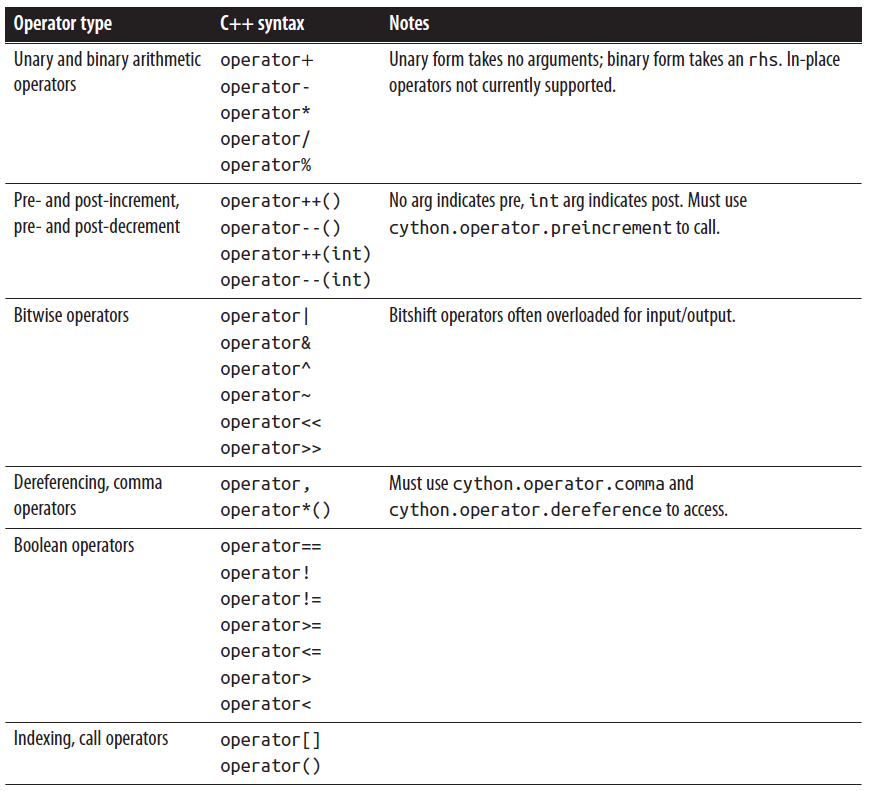

We only have to add a single declaration to our cppclass block for MT_RNG

In [ ]:
%%cython
# ...
cdef cppclass MT_RNG:
    # ...
    double operator()()
    # ...
    double operator<<()

In Python we need to use pythonic overriding. E.g.: operator() becomes `__call__`

In [ ]:
%%cython
cdef class RNG:
    # ...
    def __call__(self):
        return self._thisptr[0]()

|Operator |Function |  Method Description|
|:-------|:--------|:--------|
|+  |  __add__(self, other)  | Addition|
|*  |  __mul__(self, other)  | Multiplication|
|-  |  __sub__(self, other)  | Subtraction|
|%  |  __mod__(self, other)  | Remainder|
|/  |  __truediv__(self, other)  | Division|
|<  |  __lt__(self, other)  | Less than|
|<=  |  __le__(self, other)  | Less than or equal to|
|==  |  __eq__(self, other)  | Equal to|
|!=  |  __ne__(self, other)  | Not equal to|
|>  |  __gt__(self, other)  |Greater than|
|>=  |  __ge__(self, other)  | Greater than or equal to|
|[index]  |  __getitem__(self, index)  | Index operator|
|in  |  __contains__(self, value)  |Check membership|
|len  |__len__(self)  | The number of elements|
|str  |__str__(self)  | The string representation|

In case of nonmember functions, you can redefine it as a member method.

## C++ Exceptions

To detect automatic C++ exceptions you just use `except +` at the end of the functions.

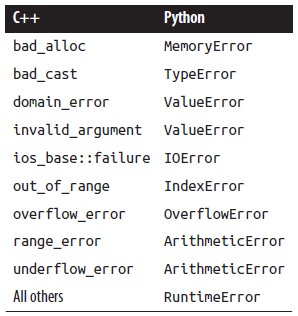

To raise a particular exception you can:

In [ ]:
%%cython
# ...
    cdef cppclass MT_RNG:
        MT_RNG(unsigned long s) except +MemoryError
        MT_RNG(unsigned long init_key[], int key_length) except +MemoryError
        # ...

For a custom handler of exceptions, that must raise a Python exception, you can:

In [ ]:
%%cython
cdef int handler():
    # ...
    
cdef extern from "mt19937.h" namespace "mtrandom":
    cdef cppclass MT_RNG:
        MT_RNG(unsigned long init_key[], int key_length) except +handler
        # ...

## Stack & Heap Allocation of C++ instances

To declare and use stack allocated C++ objects (using C++ to clean up the instance even in event of exception), we must deckare a default constructor in `cdef cppclass` block:

In [ ]:
%%cython
cdef extern from "mt19937.h" namespace "mtrandom":
    cdef cppclass MT_RNG:
        MT_RNG()
        void init_genrand(unsigned long s)
        # ...

We can now use an MT_RNG object inside a function:

In [ ]:
def m_r_l(unsigned long seed, unsigned int len):
    cdef:
        list randlist = [0] * len
        MT_RNG rng # calls default constructor
        unsigned int i
    rng.init_genrand(seed)
    for i in range(len):
        randlist[i] = rng.genrand_int32()
    return randlist

Without the nullary constructor you cannot use stack allocated C++ objects. Instead you can use heap allocated ones. We need to ensure CALLING `del` on the object with a `try/finally` block:

In [ ]:
def make_random_list(unsigned long seed, unsigned int len):
    cdef:
        # ...
        MT_RNG *rng
    rng = new MT_RNG(seed)
    try:
        # ...
    finally:
        del rng

## Class Hierarchies in C++

Subclassing is not allowed in Cython. To handle nonoverriden inherited methods we can:

- redeclare the nonvirtual base class methods in the subclass

In [ ]:
%%cython
cdef extern from "mt19937.h" namespace "mtrandom":
    cdef cppclass MT_RNG:
        # ...
    cdef cppclass MT_RNGImproved:
        MT_RNGImproved()
        unsigned long genrand_int32()
        double genrand_real1()

- Or we can explicitly cast a subclass pointer to the base class, thereby accessing the base class’s nonvirtual methods

In [ ]:
%%cython
cdef MT_RNGImproved *rng = new MT_RNGImproved()
return (<MT_RNG*>rng).genrand_int32()

## C++ Templates

### Templated Functions and Fused types

In [ ]:
#C++ template in <algorithm> header
template <class T>
const T& min(const T& a, const T& b);
template <class T>
const T& max(const T& a, const T& b);

In [ ]:
%%cython
#
cdef extern from "<algorithm>" namespace "std":
    const T max[T](T a, T b) except +
    const T min[T](T a, T b) except +

The cleanest way to wrap these functions is to declare the interface in a definition file. Also, fused types are ideal for wrapping templated functions.

### Templated Classes

To declare a templated class like `vector` we use `cdef extern` block with a `cppclass`, using the template in [] brackets after the class name.

In [ ]:
%%cython
cdef extern from "<vector>" namespace "std":
    cdef cppclass vector[T]:
        vector() except +
        vector(vector&) except +
        vector(size_t) except +
        vector(size_t, T&) except +
        T& operator[](size_t)
        void clear()
        void push_back(T&)

Stack vs Heap:

In [ ]:
%%cython
def wrapper_func(elts):
    cdef vector[int] v
    for elt in elts:
        v.push_back(elt)
    # ...
    
def wrapper_func(elts):
    cdef vector[int] *v = new vector[int]()
    # ... we need to call del on th evector!   

### Iterators and nested classes

The C++ STL uses the iterator pattern everywhere, and vectors are no exception. To
use the vector’s iterator from Cython, we declare the vector’s internal iterator as an
internal cppclass

In [ ]:
%%cython
cdef extern from "<vector>" namespace "std":
    cdef cppclass vector[T]:
        # ...
        cppclass iterator:
            T& operator*()
            iterator operator++()
            iterator operator--()
            iterator operator+(size_t)
            iterator operator-(size_t)
            bint operator==(iterator)
            bint operator!=(iterator)
            bint operator<(iterator)
            bint operator>(iterator)
            bint operator<=(iterator)
            bint operator>=(iterator)

Further details on an example of this can be found in page 150.

### Included STL Container Class Declarations

`string, vector, map, set, pair, list, queue, priority_queue, dequeue, stack, unordered_map, unordered_set`

In [ ]:
%%cython
from libcpp.vector cimport vector
cdef vector[int] *vec_int = new vector[int](10)

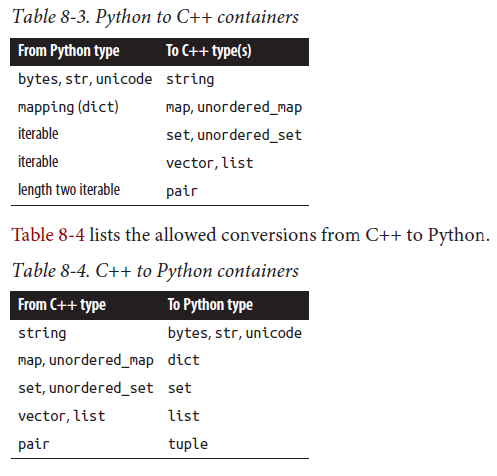

Conversions are automatic! and for most containers, iterations in a loop can also happen automatically, provided that there is a **begin** and **end** methods in C++ returning an iterator.

For example, calling std::sort with the contents of a Python list is simple. First we
cimport from libcpp.vector and declare the std::sort templated function:

In [ ]:
%%cython
from libcpp.vector cimport vector
cdef extern from "<algorithm>" namespace "std":
    void std_sort "std::sort" [iter](iter first, iter last)
    
def sort_list(list ll):
    cdef vector[int] vv = ll
    std_sort[vector[int].iterator](vv.begin(), vv.end())
    return vv

## Smart Pointers

One well known case is the shared pointer `shared_ptr`. Smart pointers dont need to be allocated and deleted. It is done automaticlaly.

In [ ]:
%%cython
cdef extern from "boost/smart_ptr/shared_ptr.hpp" namespace "boost":
    cdef cppclass shared_ptr[T]:
        shared_ptr()
        shared_ptr(T *p)
        shared_ptr(const shared_ptr&)
        long use_count()
        T operator*()

# Cython Profiling Tools

## Runtime Profiling

In [21]:
def integrate(a, b, f, N=2000):
    dx = (b - a) / N
    s = 0.0
    for i in range(N):
        s += f(a + i * dx)
    return s * dx


def sin2(x):
    return sin(x)**2


def main():
    a, b = 0.0, 2.0 * pi
    return integrate(a, b, sin2, N=400000)

In [23]:
from math import pi, sin
import cProfile

In [24]:
cProfile.run('main()', sort='time')

         800005 function calls in 0.234 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   400000    0.105    0.000    0.147    0.000 <ipython-input-21-7fc2b3983865>:9(sin2)
        1    0.087    0.087    0.234    0.234 <ipython-input-21-7fc2b3983865>:1(integrate)
   400000    0.041    0.000    0.041    0.000 {built-in method math.sin}
        1    0.000    0.000    0.234    0.234 {built-in method builtins.exec}
        1    0.000    0.000    0.234    0.234 <ipython-input-21-7fc2b3983865>:13(main)
        1    0.000    0.000    0.234    0.234 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [ ]:
%%cython
cpdef integrate(a, b, f, N=2000):
    dx = (b - a) / N
    s = 0.0
    for i in range(N):
        s += f(a + i * dx)
    return s * dx

In [26]:
cProfile.run('main()', sort='time')

         800005 function calls in 0.226 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   400000    0.107    0.000    0.151    0.000 <ipython-input-21-7fc2b3983865>:9(sin2)
        1    0.075    0.075    0.226    0.226 {built-in method _cython_magic_845e6616c44c80920a476f0477483184.integrate}
   400000    0.043    0.000    0.043    0.000 {built-in method math.sin}
        1    0.000    0.000    0.226    0.226 {built-in method builtins.exec}
        1    0.000    0.000    0.226    0.226 <ipython-input-21-7fc2b3983865>:13(main)
        1    0.000    0.000    0.226    0.226 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [27]:
%%cython
cpdef integrate(double a, double b, f, int N=2000):
    cdef:
        int i
        double dx = (b - a) / N
        double s = 0.0
    for i in range(N):
        s += f(a + i * dx)
    return s * dx

In [28]:
cProfile.run('main()', sort='time')

         800005 function calls in 0.203 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   400000    0.109    0.000    0.152    0.000 <ipython-input-21-7fc2b3983865>:9(sin2)
        1    0.051    0.051    0.203    0.203 {built-in method _cython_magic_692b3fee438c8f0040b73d787ab4f6e9.integrate}
   400000    0.042    0.000    0.042    0.000 {built-in method math.sin}
        1    0.000    0.000    0.203    0.203 {built-in method builtins.exec}
        1    0.000    0.000    0.203    0.203 <ipython-input-21-7fc2b3983865>:13(main)
        1    0.000    0.000    0.203    0.203 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [32]:
%%cython
# cython: profile=True
from math import sin
cpdef integrate(double a, double b, f, int N=2000):
    cdef:
        int i
        double dx = (b - a) / N
        double s = 0.0
    for i in range(N):
        s += f(a + i * dx)
    return s * dx

def sin2(x):
    return sin(x)**2

In [33]:
cProfile.run('main()', sort='time')

         400007 function calls in 0.183 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   400000    0.122    0.000    0.122    0.000 _cython_magic_c45f858da499413d49be08e81048ecd4.pyx:12(sin2)
        1    0.061    0.061    0.183    0.183 _cython_magic_c45f858da499413d49be08e81048ecd4.pyx:3(integrate)
        1    0.000    0.000    0.183    0.183 <ipython-input-21-7fc2b3983865>:13(main)
        1    0.000    0.000    0.183    0.183 {built-in method builtins.exec}
        1    0.000    0.000    0.183    0.183 {built-in method _cython_magic_c45f858da499413d49be08e81048ecd4.integrate}
        1    0.000    0.000    0.183    0.183 <string>:1(<module>)
        1    0.000    0.000    0.183    0.183 _cython_magic_c45f858da499413d49be08e81048ecd4.pyx:3(integrate (wrapper))
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [57]:
%%cython
from libc.math cimport sin
cpdef integrate(double a, double b, f, int N=2000):
    cdef:
        int i
        double dx = (b - a) / N
        double s = 0.0
    for i in range(N):
        s += f(a + i * dx)
    return s * dx

cpdef sin2(x):
    return sin(x)**2

In [55]:
cProfile.run('main()', sort='time')

         5 function calls in 0.049 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.048    0.048    0.048    0.048 {built-in method _cython_magic_97566448d1e5ef7e6577707a23b6415c.integrate}
        1    0.000    0.000    0.049    0.049 <ipython-input-21-7fc2b3983865>:13(main)
        1    0.000    0.000    0.049    0.049 {built-in method builtins.exec}
        1    0.000    0.000    0.049    0.049 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




## Annotations

To answer the question of why a given function is slow, Cython provides compile-time
annotations, the topic of this section. Runtime profiling and compile-time annotations
together provide complementary views of the performance of our Cython code.

### Pure Python

In [69]:
%%cython --annotate

def integrate(double a, double b, f, int N=2000):
    dx = (b - a) / N
    s = 0.0
    for i in range(N):
        s += f(a + i * dx)
    return s * dx

### Static typing of variables

In [72]:
%%cython --annotate
from libc.math cimport sin
cpdef integrate(double a, double b, f, int N=2000):
    cdef:
        int i
        double dx = (b - a) / N
        double s = 0.0
    for i in range(N):
        s += f(a + i * dx)
    return s * dx

### Static Function Pointer

In [70]:
%%cython --annotate
from libc.math cimport sin
ctypedef double (*doub_f)(double)
cdef integrate(double a, double b, doub_f f, int N=2000):
    cdef:
        int i
        double dx = (b - a) / N
        double s = 0.0
    for i in range(N):
        s += f(a + i * dx)
    return s * dx

### `cdivision` ocompiler directive

In [71]:
%%cython --annotate
cimport cython
from libc.math cimport sin
ctypedef double (*doub_f)(double)

@cython.cdivision(True)
cdef integrate(double a, double b, doub_f f, int N=2000):
    cdef:
        int i
        double dx = (b - a) / N
        double s = 0.0
    for i in range(N):
        s += f(a + i * dx)
    return s * dx

# Numpy and Typed Memoryviews

Buffers (such as NumPy arrays) can be converted to `memoryview`. This way it exposes some properties:

In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
mv = memoryview(np.ones((10,20,30)))

In [11]:
mv.ndim      # Dimensions
mv.shape     # Size in each dimension
mv.strides   # Jumps between data in each dimension
mv.itemsize  # Bytes of each item
mv.format    # Type of data, string (d f ...)

3

(10, 20, 30)

(4800, 240, 8)

8

'd'

In [12]:
dt = np.dtype([('a', np.int8), ('b', np.complex128)])

In [14]:
structured_mv = memoryview(np.empty((10,), dtype=dt))

In [15]:
structured_mv.format

'T{b:a:=Zd:b:}'

## Typed memoryview

Typed memoryviews are C efficient, with minimal Python overhead. double[:] syntax declares it to be a memoryview of type double and a single colon meaning one-dimensional arrays. Inside it you can loop over its elements using the underlying C-level data buffer. They can be applied to:
- NumPy `ndarray` objects
- `array.array` objects
- `bytes` objects
- `bytearray` objects

If a Cython function has a typed memoryview argument, it can be called with
either Python objects or C arrays as arguments.

In [16]:
%%cython --annotate
def summer(double[:] mv):
    """Sums its argument's contents."""
    cdef double d, ss = 0.0
    for d in mv:
        ss += d
    return ss

This version is very slow because it is continously calling the Python API. To make it faster (bypass Python/C API) we have to access it by indexing:

In [17]:
%%cython --annotate
def summer(double[:] mv):
    """Sums its argument's contents."""
    cdef:
        double ss = 0.0
        int i, N
    N = mv.shape[0]
    for i in range(N):
        ss += mv[i]
    return ss

There are still some Python checks for index error. If we're sure of what we're doing (or we'll get Segmentation Fault), we can disable them using Compiler Directives (either at file level `#cython`, at function level `@` or in a context manager in a `with` block):

In [19]:
%%cython --annotate
# cython: boundscheck=False
# cython: wraparound=False

from cython cimport boundscheck, wraparound

@boundscheck(False)
@wraparound(False)
def summer(double[:] mv):
    """Sums its argument's contents."""
    cdef:
        double ss = 0.0
        int i, N
    N = mv.shape[0]
    with boundscheck(False), wraparound(False):
        for i in range(N):
            ss += mv[i]
        return ss

### Declaring Typed Memoryviews

- *Element type*: scalar (`int`, `float`, `double complex`...), ctypedef alias, or cdef struct. Fused types are in development.
- *Dimensionality*: up to seven dimensions. E.g.: 3D double is double[:,:,:].
- *Contiguous or strided data packing*. No strides allows faster data manipulation.
- *C (column, last dim) or Fortran (row, first dim) contiguity*. 
- *Direct or indirect access*: direct is default, since NumPy doesn't have pointers to pieces of the array.

Typed memoryviews with N dimensions can acquire buffers from objects of same dimensionality regardless of data packing.

In [24]:
%%cython
import numpy as np

# Declare 3D strided MemoryView: most flexible and general.
cdef int[:, :, :] mv

# Acquire NumPy buffer
mv = np.empty((10, 20, 30), dtype=np.int32)

# Acquire Numpy buffer Fortran contiguous.
mv = np.ones((10, 20, 30), dtype=np.int32, order='F')

# Acquire buffer from fully strided array
arr = np.ones((13, 17, 19), dtype=np.int32)
mv = arr[4:10:2, ::3, 5::-2]

# 2D C-contiguous typed memoryview
cdef float[:, ::1] c_contig_mv

# Assign C-contiguous NumPy array (default for NumPy)
c_contig_mv = np.ones((3, 4), dtype=np.float32)

# Cannot assign Fortran or strided arrays
c_contig_mv = np.ones((3, 4), dtype=np.float32, order='F')
#=> ValueError: ndarray is not C-contiguous
arr = np.ones((3, 4), dtype=np.float32)
c_contig_mv = arr[:, ::2]
#=> ValueError: ndarray is not C-contiguous

# 2D Fortran-contiguous declaration
cdef double[::1, :] f_contig_mv = np.ones((3, 4), dtype=np.float64, order='F')

[3, 6, 3, 0, 0, 0, 0, 0]


**The recommended declaration is C-CONTIGUOUS**

NumPy provides the `ascontiguousarray` and `asfortranarray` conversion functions,
which take an array-like object as an argument and return a guaranteed C- or Fortrancontiguous
NumPy array, respectively.

Fully strided is advisable for ambiguous array layouts.

### Operations in memoryviews

Access and modify individual elements via indexing

In [ ]:
%%cython
cdef int[:, :] mv = obj
print(mv[10, -20]) # access
mv[0, -1] = 3 # modify

Efficient indexing

In [ ]:
%%cython
from cython cimport boundscheck, wraparound
def mv_sum(int[:, ::1] mv):
    cdef int N, M, i, j
    cdef long s=0
    N = mv.shape[0]; M = mv.shape[1]
    with boundscheck(False), wraparound(False):
        for i in range(N):
            for j in range(M):
                s += mv[i,j]
    return s

Data copying using slice assignments (we can also use the `copy` or `copy_fortran` to generate a contiguous copy of the memoryview's buffer.

In [36]:
%%cython 
import math
import numpy as np
cdef double[:, :] mv = np.empty((10, 20))
mv[...] = math.pi

# Slice assignment with same size
cdef double[:, :] mv1 = np.zeros((10, 20))
cdef double[:, ::1] mv2 = 2*np.ones((20, 40))
mv1[::2, ::2] = mv2[1:11:2, 10:40:3]
print(np.array(mv1[::,::]))

[[2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0. 2. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Slicing a buffer with a memoryview can be saved in a different memoryview (**reduce dimensions**)

In [ ]:
cdef float[:, :, ::1] mv = obj
cdef float[:, :] two_dee_mv = mv[:, 0, :]

# Ussual start-stop-step arguments
two_dee_mv[...] = mv[4:10:2, ::3, -1]

# Partial indexing just like NumPy arrays
cdef int[:, :, :] mv = obj
assert mv[10].shape == mv[10, ...].shape == mv[10, :, :].shape

We can **insert new dimensions**.

In [ ]:
cdef double[:] mv = np.ones((50,))
assert mv[None, :].shape == (1, 50)
assert mv[:, None].shape == (50, 1)

Broadcasting operations: by efficiently making NumPy arrays (thanks to buffer protocol):

In [39]:
%%cython
import numpy as np
cdef float[:] rows = np.arange(100, dtype=np.float32)
cdef float[:] cols = rows

# broadcasting sum
plane = np.asarray(rows[:,None]) + np.asarray(cols[None,:])
print(np.array(plane))

[[  0.   1.   2. ...  97.  98.  99.]
 [  1.   2.   3. ...  98.  99. 100.]
 [  2.   3.   4. ...  99. 100. 101.]
 ...
 [ 97.  98.  99. ... 194. 195. 196.]
 [ 98.  99. 100. ... 195. 196. 197.]
 [ 99. 100. 101. ... 196. 197. 198.]]


Transpose using .T just like in NumPy. C-contiguous <-> Fortran-contiguous.

In [ ]:
%%cython
cdef int[:, ::1] c_contig = obj
cdef int[::1, :] f_contig = c_contig.T

### Beyond Buffers: C arrays

We can convert a C array into a memoryview (always C-contiguous)

In [ ]:
%%cython
cdef int a[3][5][7]
cdef int[:, :, ::1] mv = a
mv[...] = 0

Even if our array was dynamically allocated, we could convert it, this time by casting it:

In [ ]:
%%cython
from libc.stdlib cimport malloc
def dynamic(size_t N, size_t M):
    cdef long *arr = <long*>malloc(N * M * sizeof(long))
    cdef long[:, ::1] mv = <long[:N, :M]>arr

## Wrapping C and C++ arrays

C++ arrays are OK (dynamic memory management). To be able to handel deallocation of these memoryview objects when passing C arrays by reference, NumPy has a function pointer that you must fill:

In [ ]:
%%cython
import numpy as np
cimport numpy as cnp
from libc.stdlib cimport free

cdef extern from "matrix.h":
    float *make_matrix_c(int nrows, int ncols)

cdef class _finalizer:
    cdef void *_data
    def __dealloc__(self):
        if self._data != NULL:
            free(self._data)
            
cdef void set_base(cnp.ndarray arr, void *carr):
    cdef _finalizer f = _finalizer()
    f._data = <void*>carr
    cnp.set_array_base(arr, f)
            
def make_matrix(int nrows, int ncols):
    cdef float *mat = make_matrix_c(nrows, ncols)            
    cdef float[:, ::1] mv = <float[:nrows, :ncols]>mat
    cdef cnp.ndarray arr = np.asarray(mv)
    set_base(arr, mat) # Defining the dealloc for the object
    return arr

# Parallelizing Programs

## Tampering GIL

Since we're working with CPython, the Global Interpreter Lock (or GIL) is in place to ensure thread-safe execution. We need to allow functions and use context managers to disable it. To **allow no gil** we include it like this:


In [ ]:
%%cython
cdef int kernel(double z, double z_max) nogil:
    # ..

Inside the function we must not create or interact with Python objects. We can also declare extern C/C++ functions to be nogil as well:

In [ ]:
%%cython
cdef extern from "math.h":
    double sin(double x) nogil
    double cos(double x) nogil
    double tan(double x) nogil
    # ...
    
# It is easier if no interaction with Python objects
cdef extern from "math.h" nogil:
    double sin(double x)
    double cos(double x)
    double tan(double x)
    # ...

Then, we need to **release and recover** the GIL, while leaving no Python objects inside it:

In [ ]:
%%cython
# ...declare and initialize C arguments...

with nogil: # run without the GIL in place
    result = kernel(z, z_max, n_max)
    
# GIL reacquired
print result

If we needed to **reacquire the GIL** inside the nogil context manager, we would use another context manager:

In [ ]:
%%cython
# ...declare and initialize C arguments...

with nogil: # run without the GIL in place
    result = kernel(z, z_max, n_max)
    with gil: # GIL reacquired
        print("here its safe!")
            # run without the GIL in place
            
            
# GIL reacquired
print(result)

Thread-based parallelism in external libraries can be encapsulated like this

## `prange`

This is implemented using OpenMP, and this requires -fopenmp flag when compiling and linking our library. 

In [ ]:
%%cython
# distutils: extra_compile_args = -fopenmp
# distutils: extra_link_args = -fopenmp

from cython cimport boundscheck, wraparound
from cython.parallel cimport prange

@boundscheck(False)
@wraparound(False)
def parallelFunc:
    for i in prange(N + 1, nogil=True):
        # Thread-safe loop, using nogil functions

To play with partitions, we can tweak some parameters:

In [ ]:
def parallelFunc(...):
    # ...
    for i in prange(resolution + 1, nogil=True,
                schedule='static', chunksize=1):
        # ...

Schedule can be:
- **static**: Iterations are assigned to threads in a fixed way at compile time. If chunksize is not given, the iterations are distributed in num_threads contiguous blocks, one block per thread. If chunksize is given, each chunk is assigned to threads in a roundrobin fashion. This is best when the work is evenly distributed and generally known ahead of time.
- **dynamic**: Threads ask the scheduler for the next chunk dynamically at runtime. The chunksize defaults to 1. A dynamic schedule is best when the workload is unevenly distributed and unknown ahead of time. 
- **guided**: Chunks are distributed dynamically, like with dynamic. Unlike with dynamic, the chunksize is not fixed but rather is proportional to the remaining iterations divided by the number of threads.
- **runtime**: The schedule and chunksize are determined by either the openmp.openmp_set_schedule function or the OMP_SCHEDULE environment variable at runtime. This allows exploration of different schedules and chunksizes without recompiling, but may have poorer performance overall as no compile-time optimizations are possible.

Typically static with a tuned chunksize is a good first approach;
dynamic and guided incur runtime overhead and are appropriate in
dynamically changing execution contexts. The runtime schedule provides
maximum flexibility among all other schedule types.

Prange has `start`, `stop` and `step` parameters.

Since we have alreadu OpenMP, we can use its functions:

In [ ]:
%%cython
cimport openmp